In [44]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('moviereviews2.tsv', sep='\t')

In [5]:
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


Data Cleaning

In [6]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [7]:
df.dropna(inplace = True)

In [10]:
doc = 'hi this is Kranthi'

# Data Preprocessing
     Lower case
 
     Tokenization
 
     Removal special characters
 
     Removing stop words and punctuation
 
     Stemming

In [24]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [22]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
ps = PorterStemmer()

In [36]:
def transform_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    new_text = []
    new_text1 = []
    for i in text:
        if (i not in punctuation) and (i not in stopwords.words('english')):
            new_text.append(i)
            
    for i in new_text:
        new_text1.append(ps.stem(i))
        
    return ' '.join(new_text1)

In [37]:
df['review_transformed'] = df['review'].apply(transform_text)

In [38]:
df.head()

,label,review,review_transformed
0,pos,I loved this movie and will watch it again. Or...,love movi watch origin twist plot man vs man v...
1,pos,"A warm, touching movie that has a fantasy-like...",warm touch movi fantasy-lik quality. br br ell...
2,pos,I was not expecting the powerful filmmaking ex...,expect power filmmak experi `` girlfight '' 's...
3,neg,"This so-called ""documentary"" tries to tell tha...",so-cal `` documentari '' tri tell usa fake moo...
4,pos,This show has been my escape from reality for ...,show escap realiti past ten year sadli miss al...


In [39]:
from wordcloud import WordCloud

In [43]:
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color = 'white')
positive = wc.generate(df[df['label']=='pos']['review_transformed'].str.cat(sep=" "))

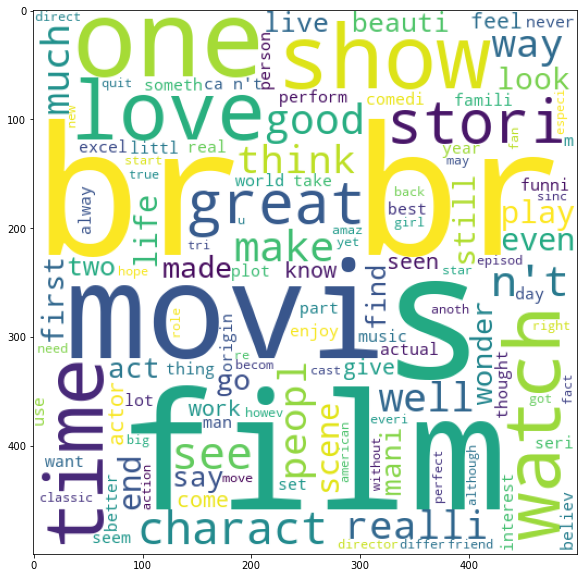

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(positive)
plt.show()

In [47]:
negative = wc.generate(df[df['label']=='neg']['review_transformed'].str.cat(sep=" "))

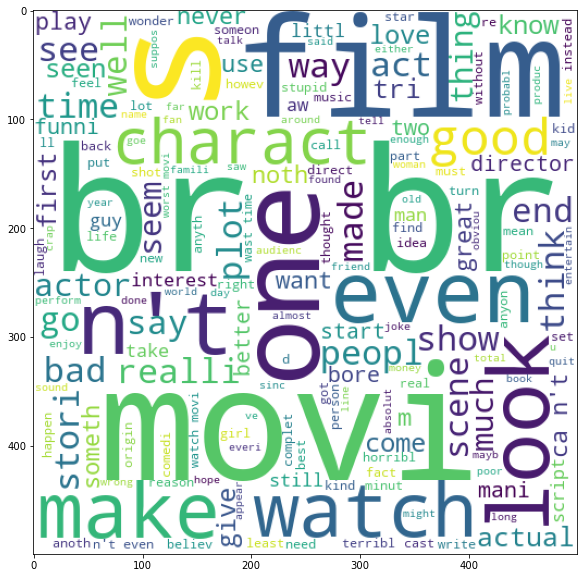

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(negative)
plt.show()

In [132]:
X = df['review_transformed']
y = df['label']

In [163]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [133]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [153]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [136]:
X_train.shape

(4784,)

# Model building

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [145]:
lr = LogisticRegression()
svc = SVC(kernel = 'sigmoid', gamma = 0.1)
dtc = DecisionTreeClassifier(max_depth=50)
rfc = RandomForestClassifier(n_estimators = 50)
abc = AdaBoostClassifier(n_estimators = 50)
gbc = GradientBoostingClassifier(n_estimators = 50)
xgb = XGBClassifier(n_estimators = 50)

mnb = MultinomialNB()


In [146]:
models = {'LR' : lr, 'SVC' : svc, 'DTC' : dtc, 'RFC' : rfc, 'ABC' : abc,
          'GBC' : gbc, 'XBG' : xgb,  'MNB' : mnb}

In [140]:
from sklearn.metrics import accuracy_score, f1_score

In [141]:
from sklearn.pipeline import Pipeline

In [155]:
for name,model in models.items():
    print('CountVectorizer')
    label_classifier_cv = Pipeline([('cv',CountVectorizer()),('model', model)])
    label_classifier_cv.fit(X_train, y_train)
    y_train_pred = label_classifier_cv.predict(X_train)
    y_test_pred = label_classifier_cv.predict(X_test)
    print('Name : {}, Training_accuracy_score : {}, Test_accuracy_score : {}' .format(name,accuracy_score(y_train,y_train_pred),
                                                           accuracy_score(y_test,y_test_pred)))
    
    
    print('Tf-idf Vectorizer')
    label_classifier_tfidf = Pipeline([('cv',TfidfVectorizer(max_features=3000)),('model', model)])
    label_classifier_tfidf.fit(X_train, y_train)
    y_train_pred = label_classifier_tfidf.predict(X_train)
    y_test_pred = label_classifier_tfidf.predict(X_test)
    print('Name : {}, Training_accuracy_score : {}, Test_accuracy_score : {}' .format(name,accuracy_score(y_train,y_train_pred),
                                                           accuracy_score(y_test,y_test_pred)))

CountVectorizer


C:\Users\enoch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Name : LR, Training_accuracy_score : 0.9989548494983278, Test_accuracy_score : 0.9021739130434783
Tf-idf Vectorizer
Name : LR, Training_accuracy_score : 0.9540133779264214, Test_accuracy_score : 0.9063545150501672
CountVectorizer
Name : SVC, Training_accuracy_score : 0.6070234113712375, Test_accuracy_score : 0.6070234113712375
Tf-idf Vectorizer
Name : SVC, Training_accuracy_score : 0.9239130434782609, Test_accuracy_score : 0.8879598662207357
CountVectorizer
Name : DTC, Training_accuracy_score : 0.9847408026755853, Test_accuracy_score : 0.7759197324414716
Tf-idf Vectorizer
Name : DTC, Training_accuracy_score : 0.982232441471572, Test_accuracy_score : 0.7792642140468228
CountVectorizer
Name : RFC, Training_accuracy_score : 1.0, Test_accuracy_score : 0.887123745819398
Tf-idf Vectorizer
Name : RFC, Training_accuracy_score : 1.0, Test_accuracy_score : 0.8946488294314381
CountVectorizer
Name : ABC, Training_accuracy_score : 0.8605769230769231, Test_accuracy_score : 0.8687290969899666
Tf-idf 

In [159]:
model = Pipeline([('cv', CountVectorizer()),('model', mnb)])
model.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('model', MultinomialNB())])

In [189]:
model.predict(['Superb Megastar movie Acharya to watch total family entertainment, fights, action scenes, songs Chiru Charan duo song, Megastar dialogues are pluses....my rating 4.5/5'])

array([1])

In [187]:
model.predict(['Though its multistar movie its still disapoint audience with slow naration. Its not piece of cake from koratala shiva direction. But for megha fans its eye feast to watch Ram sir and Chiranjeevi sir in single screen. Over all disappointment for Megha fans'])

array([0])